<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/expt1_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the packages
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Simple linear regression using LinearRegression from sklearn

In [ ]:
df= pd.read_excel('/content/HoursMarks.xlsx') #Read the excel or csv file

In [ ]:
print(df)

   hours  marks
0      5      9
1      7     11
2     12     18
3      9     15
4      2      5
5      4      7


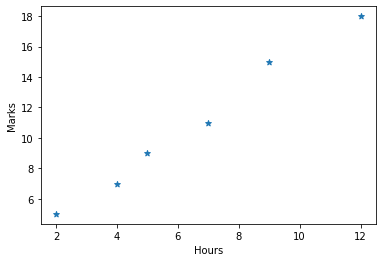

In [ ]:
#Plot a scatter plot
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.scatter(df.hours, df.marks, marker ="*")


In [ ]:
x= df[["hours"]] #Assign values of hours and marks column to a variable
y=df[['marks']]

In [ ]:
#Create linear regression model
model= LinearRegression()
model.fit(x,y ) #fit the data in the model

LinearRegression()

In [ ]:
#Print the results
#Coefficient of determination (𝑅²) 
r_sq = model.score(x, y)
print("r^2 is ", r_sq)

r^2 is  0.9895972624374836


In [ ]:
# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ 
#and .coef_, which represents 𝑏₁

print('intercept:', model.intercept_)

print('slope:', model.coef_)


intercept: [2.05089059]
slope: [[1.35114504]]


In [ ]:
#Make prediction for x=10 hours

model.predict([[10]])

array([[15.56234097]])

In [ ]:
#Make prediction for all the values of x
yPred= model.predict(x)
print(yPred)

[[ 8.80661578]
 [11.50890585]
 [18.26463104]
 [14.21119593]
 [ 4.75318066]
 [ 7.45547074]]


In [ ]:
df['marksPred']=yPred #Add this column to the data frame

In [ ]:
print(df) 

   hours  marks  marksPred
0      5      9   8.806616
1      7     11  11.508906
2     12     18  18.264631
3      9     15  14.211196
4      2      5   4.753181
5      4      7   7.455471


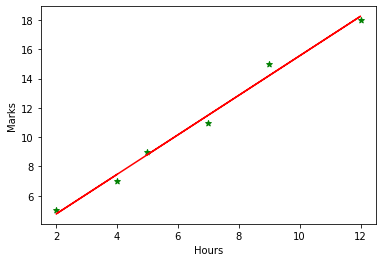

In [ ]:
#%matplotlib inline
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.scatter(df.hours,df.marks, color="green", marker="*")
plt.plot(df.hours, df.marksPred, color='red')

Simple linear regression using equations , without using built-in function in sklearn

In [ ]:
df1= pd.read_excel('/content/HoursMarks.xlsx') #read the excel sheet

In [ ]:
print(df1)

   hours  marks
0      5      9
1      7     11
2     12     18
3      9     15
4      2      5
5      4      7


In [ ]:
df1= df1.rename(columns={'hours': 'x', "marks": 'y'})#change column headings

In [ ]:
print(df1)

    x   y
0   5   9
1   7  11
2  12  18
3   9  15
4   2   5
5   4   7


In [ ]:
#Obtain mean for hours and marks column
xMean= df1['x'].mean()
yMean= df1["y"].mean()
print("xMean= ", xMean)
print("yMean= ", yMean)

xMean=  6.5
yMean=  10.833333333333334


In [ ]:
df1["xi-xMean"]= df1[["x"]]-xMean
df1["yi-yMean"]= df1[["y"]]-yMean

In [ ]:
print(df1)

    x   y  xi-xMean  yi-yMean
0   5   9      -1.5 -1.833333
1   7  11       0.5  0.166667
2  12  18       5.5  7.166667
3   9  15       2.5  4.166667
4   2   5      -4.5 -5.833333
5   4   7      -2.5 -3.833333


In [ ]:
df1["(xi-xMean)^2"]= df1[["xi-xMean"]]**2
print(df1)

    x   y  xi-xMean  yi-yMean  (xi-xMean)^2
0   5   9      -1.5 -1.833333          2.25
1   7  11       0.5  0.166667          0.25
2  12  18       5.5  7.166667         30.25
3   9  15       2.5  4.166667          6.25
4   2   5      -4.5 -5.833333         20.25
5   4   7      -2.5 -3.833333          6.25


In [ ]:
df1["(xi-xMean)(yi-yMean)"]= df1["xi-xMean"]*df1["yi-yMean"]
print(df1)

    x   y  xi-xMean  yi-yMean  (xi-xMean)^2  (xi-xMean)(yi-yMean)
0   5   9      -1.5 -1.833333          2.25              2.750000
1   7  11       0.5  0.166667          0.25              0.083333
2  12  18       5.5  7.166667         30.25             39.416667
3   9  15       2.5  4.166667          6.25             10.416667
4   2   5      -4.5 -5.833333         20.25             26.250000
5   4   7      -2.5 -3.833333          6.25              9.583333


In [ ]:
df1["(xi-xMean)(yi-yMean)"].sum()

88.5

In [ ]:
# find the slope b1 using the formula
b1= df1["(xi-xMean)(yi-yMean)"].sum()/df1["(xi-xMean)^2"].sum()
print("slope of the line b1 = ", b1)

slope of the line b1 =  1.3511450381679388


In [ ]:
b1= np.round(b1, 6) #round the value of b1 to 6 decimal places
print(b1)

1.351145


In [ ]:
#find the y intercept b0 using the formula
b0= np.round(yMean-b1*xMean,6)
print(b0)

2.050891


In [ ]:
#create one coulum of predicted values of y in the data frame
df1['yPred']= b0+ b1*x 
print(df1)

    x   y  xi-xMean  yi-yMean  (xi-xMean)^2  (xi-xMean)(yi-yMean)      yPred
0   5   9      -1.5 -1.833333          2.25              2.750000   8.806616
1   7  11       0.5  0.166667          0.25              0.083333  11.508906
2  12  18       5.5  7.166667         30.25             39.416667  18.264631
3   9  15       2.5  4.166667          6.25             10.416667  14.211196
4   2   5      -4.5 -5.833333         20.25             26.250000   4.753181
5   4   7      -2.5 -3.833333          6.25              9.583333   7.455471


In [ ]:
#Calculate SSR, SSE and SST
SSE= ((df1["y"]- df1['yPred'])**2).sum()
print(SSE)

1.256997455470999


In [ ]:
SSR= ((df1['yPred']-yMean)**2).sum()
print(SSR)

119.5763291221377


In [ ]:
SST= ((df1["y"]-yMean)**2).sum()
print(SST)

120.83333333333333


In [ ]:
#Calculate R-squared value using the formual
r_sq= SSR/SST
print(r_sq)

0.9895972065280361
